# Import and explore the data.

In [1]:
#Loading the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collinearity import SelectNonCollinear
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn import metrics
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import Normalizer

In [2]:
#Import the datasets
data_1= pd.read_csv('signal-data.csv')

In [3]:
#Printing the first 2 rows of the dataset.
data_1.head(2)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.006,208.2045,-1


In [4]:
data_1.shape

(1567, 592)

### There are a total of 1567 rows and 592 columns.

# Data cleansing

In [5]:
#We will now find out the total number of null values.
data_1.isnull().any().any()

True

#### True denotes that there missing values.

In [6]:
data_1 = data_1.replace('',np.nan)

In [7]:
data_1.isna().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

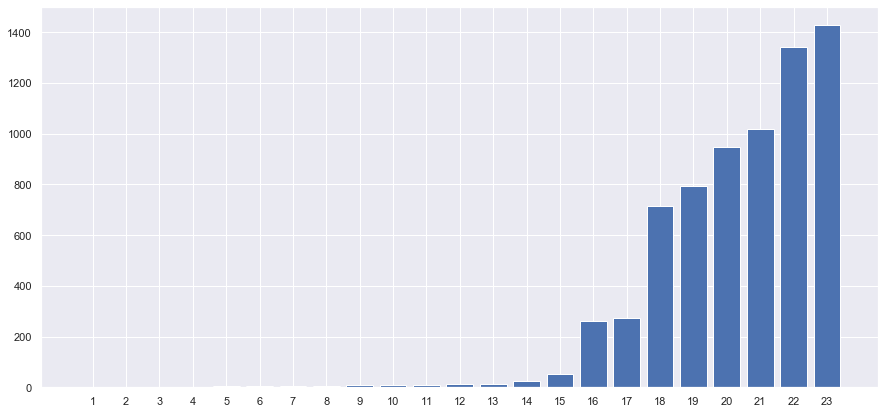

In [8]:
#We will plot to see the number of missing data before filling them with mean. The missing values above 40% threshold 
# will be removed
miss=data_1.isna().sum()
fig = plt.subplots(figsize=(15,7))

plt.bar(np.arange(1, miss.sort_values(ascending=True).nunique()+1,1),
       miss.sort_values(ascending=True).unique())
plt.xticks(np.arange(1, miss.sort_values(ascending=True).nunique()+1,1));

In [9]:
#We will now remove same values displayed throughout the column.
data_1.drop(['5','13','42','49','52','69','97','141',
             '149','178','179','186','189','190','191','192',
             '193','194','226','229','230','231','232','233',
             '234','235','236','237','240','241','242','243',
             '256','257','258','259','260','261','262','263',
             '264','265','266','276','284','313','314','315',
             '322','325','326','327','328','329','330','364',
             '369','370','371','372','373','374','375','378',
             '379','380','381','394','395','396','397','398',
             '399','400','401','402','403','404','414','422',
             '449','450','451','458','461','462','463','464',
             '465','466','481','498','501','502','503','504',
             '505','506','507','508','509','512','513','514',
             '515','528','529','530','531','532','533','534',
             '535','536','537','538'],axis=1,inplace=True)

In [10]:
# saving missing values in a variable
a = data_1.isnull().sum()/len(data_1)*100
variables= list(data_1.columns)
variable = [] 

#As mentioned earlier missing values above 40% threshold will be removed.
for i in range(data_1.columns.shape[0]):
    if a[i]<=40: #setting the threshold as 40%
        variable.append(variables[i])

new_data = data_1[variable]
new_data.head()

,Time,0,1,2,3,4,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [11]:
data=new_data.fillna(new_data.mean())
data.isnull().any().any()
data.shape

(1567, 444)

#### There are a total of 1567 rows and 444 columns. The features have been reduced from 592 to 444 now.We will further process to reduce the number of features.

# Data Visualisation

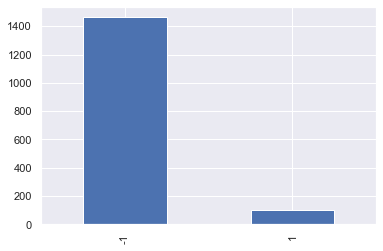

In [12]:
data["Pass/Fail"].value_counts().plot(kind="bar");

In [13]:
#The plot clearly depicts that the target class is highly imbalanced.

In [14]:
from datetime import datetime
data['year'] = pd.DatetimeIndex(data['Time']).year
data['month'] = pd.DatetimeIndex(data['Time']).month
data['date'] = pd.DatetimeIndex(data['Time']).day
data['week_day'] = pd.DatetimeIndex(data['Time']).weekday
data['start_time'] = pd.DatetimeIndex(data['Time']).time
data['hour'] = pd.DatetimeIndex(data['Time']).hour
data['min'] = pd.DatetimeIndex(data['Time']).minute

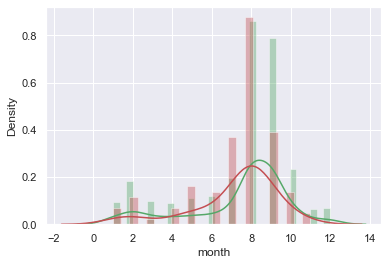

In [15]:
sns.distplot( data[data["Pass/Fail"] == -1]['month'], color = 'g');
sns.distplot( data[data["Pass/Fail"] == 1]['month'], color = 'r');

### August and September are months with most failures, August has also nearly many pass.

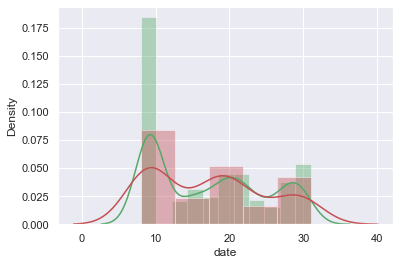

In [16]:
sns.distplot( data[data["Pass/Fail"] == -1]['date'], color = 'g');
sns.distplot( data[data["Pass/Fail"] == 1]['date'], color = 'r');

### The failures tend to decrease towards month end.

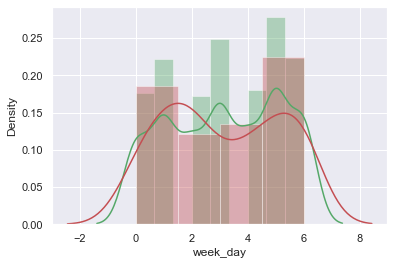

In [17]:
sns.distplot( data[data["Pass/Fail"] == -1]['week_day'], color = 'g');
sns.distplot( data[data["Pass/Fail"] == 1]['week_day'], color = 'r');

### Failures appear to be more towards start and end of the week rather than in the middle of the week

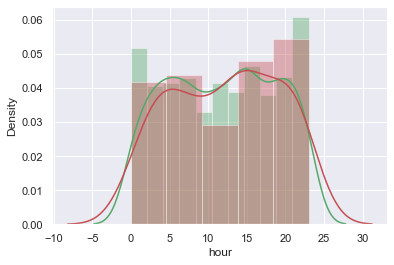

In [18]:
sns.distplot( data[data["Pass/Fail"] == -1]['hour'], color = 'g');
sns.distplot( data[data["Pass/Fail"] == 1]['hour'], color = 'r');

### Both pass and fail are fairly distributed

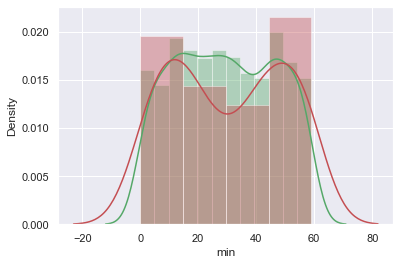

In [19]:
sns.distplot( data[data["Pass/Fail"] == -1]['min'], color = 'g');
sns.distplot( data[data["Pass/Fail"] == 1]['min'], color = 'r');

### Both pass and fail are fairly distributed

In [20]:
data.corr()

,0,1,2,3,4,6,7,8,9,10,...,587,588,589,Pass/Fail,year,month,date,week_day,hour,min
0,1.000000,-0.143840,0.004756,-0.007613,-0.011014,0.002270,0.031483,-0.052622,0.009045,0.006504,...,-0.025880,-0.028166,0.004174,-0.025141,NaN,0.004907,0.029778,0.024759,0.000183,0.012332
1,-0.143840,1.000000,0.005767,-0.007568,-0.001636,-0.025564,-0.012037,0.031258,0.023964,0.009645,...,0.017266,0.010118,0.044797,-0.002603,NaN,-0.021801,0.003651,-0.030326,0.027295,0.015049
2,0.004756,0.005767,1.000000,0.298935,0.095891,-0.136225,-0.146213,0.023528,0.016168,0.069893,...,-0.029345,-0.030818,-0.032890,-0.000957,NaN,-0.038922,-0.036763,-0.110435,-0.001654,-0.015614
3,-0.007613,-0.007568,0.298935,1.000000,-0.058483,-0.685835,0.073856,-0.102892,0.068215,0.049873,...,-0.039132,-0.033645,-0.080341,-0.024623,NaN,0.202195,0.075708,-0.072364,0.013394,0.015813
4,-0.011014,-0.001636,0.095891,-0.058483,1.000000,-0.074368,-0.347734,-0.025946,0.054206,-0.006470,...,-0.031005,-0.026100,0.050910,-0.013756,NaN,0.007377,-0.048759,0.008478,-0.034970,0.014839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
month,0.004907,-0.021801,-0.038922,0.202195,0.007377,-0.173706,-0.101194,-0.091733,0.155016,-0.098456,...,0.005449,0.015542,0.030287,-0.020689,NaN,1.000000,0.407196,-0.141193,0.020851,-0.009937
date,0.029778,0.003651,-0.036763,0.075708,-0.048759,-0.077997,0.059192,0.090674,0.113938,-0.101992,...,-0.001288,-0.004156,-0.055501,0.000713,NaN,0.407196,1.000000,0.061621,-0.013218,0.011992
week_day,0.024759,-0.030326,-0.110435,-0.072364,0.008478,0.011873,0.074747,0.060111,0.042929,-0.086627,...,-0.081355,-0.095696,-0.046050,-0.006259,NaN,-0.141193,0.061621,1.000000,-0.012971,-0.015404
hour,0.000183,0.027295,-0.001654,0.013394,-0.034970,-0.013916,0.042473,0.015765,0.017900,-0.007937,...,0.033205,0.027357,-0.013009,0.015963,NaN,0.020851,-0.013218,-0.012971,1.000000,-0.032017


# Data pre-processing

In [21]:
#Now we are going to further process the data by reducing the features. As a result, we are first seperating into predictors and 
#target variables.
#Once, we reduce the features, we will fix target imbalance on the data.
X = data.drop(["Pass/Fail",'Time','year','month','date','week_day','start_time','hour','min'], axis = 1)
y = data["Pass/Fail"]
X.head()

,0,1,2,3,4,6,7,8,9,10,...,576,577,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200


In [22]:
X.shape

(1567, 442)

### We now have 1567 rows and 442 columns

In [23]:
normalizer = Normalizer()
normalizer.fit(X)

Normalizer()

In [24]:
X_nrm = pd.DataFrame(normalizer.transform(X), columns = X.columns)

In [25]:
# Now, we can remove columns with very low variance

In [26]:
selector = VarianceThreshold()
selector.fit(X_nrm)

mask = selector.get_support()
columns = X_nrm.columns
selected_cols = columns[mask]
n_features2 = len(selected_cols)
print(f'remaining features: {n_features2}')

remaining features: 442


In [27]:
# The following function will help us select highly correlated features

def high_correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [28]:
# We are now removing features above 0.95 high correlation.
corr_features = high_correlation(X, 0.95)
X_corr = X.drop(corr_features, axis=1)
n_features_left = X_corr.shape[1]
n_features_left

269

In [29]:
# There are 269 features remaining now.

In [30]:
# We will remove a feature with low correlation with target.

In [31]:
def corr_with_target(dataframe, target, threshold):
    cor = dataframe.corr()
    #Correlation with output variable
    cor_target = abs(cor[target])
    #Selecting non correlated features
    relevant_features = cor_target[cor_target<threshold]
    return relevant_features.index.tolist()[:-1]

sample_train = X_corr.copy()
sample_train['target'] = y

corrwith_cols = corr_with_target(dummy_train, 'target', 0.05)
X_corw = X_corr.drop(corrwith_cols, axis=1)
n_features_left = X_corw.shape[1]
n_features_left

62

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_corw)

StandardScaler()

In [33]:
X_std = pd.DataFrame(scaler.transform(X_corw), columns=X_corw.columns)
X_std.head()
X_std.shape

(1567, 62)

# Train the model without handling Imbalanced Data. We will also use LazyPredict to see which model is performing how ?

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyClassifier

In [35]:
X_train, X_test, y_train, y_test =train_test_split(X_std,y,test_size=0.3,random_state =42)

In [36]:
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

classification=LazyClassifier(verbose=0,predictions=True)
models_c,predictions_c=classification.fit(X_train, X_test, y_train, y_test)
models_c

  0%|                                                                                           | 0/29 [00:00<?, ?it/s]

Number transactions X_train dataset:  (1096, 62)
Number transactions y_train dataset:  (1096,)
Number transactions X_test dataset:  (471, 62)
Number transactions y_test dataset:  (471,)


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:08<00:00,  3.59it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.80,0.65,0.65,0.84,0.04
PassiveAggressiveClassifier,0.86,0.61,0.61,0.88,0.05
BernoulliNB,0.86,0.61,0.61,0.87,0.05
LinearDiscriminantAnalysis,0.93,0.60,0.60,0.92,0.06
GaussianNB,0.89,0.59,0.59,0.89,0.03
SGDClassifier,0.90,0.57,0.57,0.90,0.04
LogisticRegression,0.93,0.56,0.56,0.91,0.13
AdaBoostClassifier,0.92,0.55,0.55,0.91,0.67
LinearSVC,0.93,0.54,0.54,0.91,0.21


In [37]:
# THE LAZYPREDICT CLASSIFIER HAS GIVEN THE LIST OF ALGORITHMS PREDICTED USING IMBALANCED DATASET.

In [38]:
#INORDER TO HANDLE THE IMBALANCED DATASET, WE WILL CHOOSE OVERSAMPLING METHODS : SMOTE, ADASYN, RANDOM OVER SAMPLING ALONG WITH 
# SUPERVISED LEARING ALGORITHMS LOGISTIC REGRESSION,SVM AND COMPARE THEIR PERFORMANCES.

# SMOTE - LOGISTIC REGRESSION, SVM

In [39]:
# import SMOTE module from imblearn library

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of X_train_res: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of y_train_res: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '-1': {}".format(sum(y_train_res == -1)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))

After OverSampling, the shape of X_train_res: (2046, 62)
After OverSampling, the shape of y_train_res: (2046,) 

After OverSampling, counts of label '-1': 1023
After OverSampling, counts of label '1': 1023


#### LOGISTIC REGRESSION

In [40]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.95      0.84      0.89       440
           1       0.15      0.42      0.22        31

    accuracy                           0.81       471
   macro avg       0.55      0.63      0.56       471
weighted avg       0.90      0.81      0.85       471

[[368  72]
 [ 18  13]]


#### It can be seen that  368 has been identified correctly and 72 has been wrongly identified as 1
#### It can be seen that  18 has been identified correctly and 13 has been wrongly identified as -1

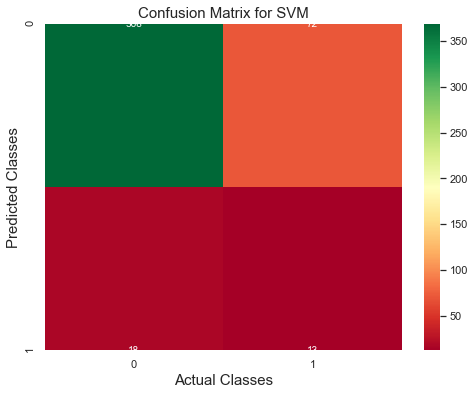

In [41]:
#visualization of confusion matrix in the form of a heatmap
cm= confusion_matrix(y_test, predictions)
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for SVM', fontsize = 15);

In [42]:
# The accuracy is 81%, where the recall is great.

#### SVM

In [43]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train_res, y_train_res.ravel())
predictions = clf.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.94      0.95      0.94       440
           1       0.12      0.10      0.11        31

    accuracy                           0.89       471
   macro avg       0.53      0.52      0.52       471
weighted avg       0.88      0.89      0.89       471

[[417  23]
 [ 28   3]]


In [44]:
# The accuracy is 89%, where the recall is great.

#### It can be seen that  417 has been identified correctly and 23 has been wrongly identified as 1
#### It can be seen that  28 has been identified correctly and 3 has been wrongly identified as -1

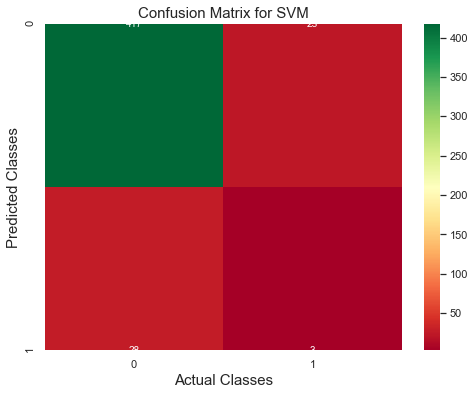

In [45]:
#visualization of confusion matrix in the form of a heatmap
cm= confusion_matrix(y_test, predictions)
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for SVM', fontsize = 15);

In [46]:
# On comparing, Logistic Regression and SVM, we can see that SVm has performed better.

# ADASYN - LOGISTIC REGRESSION, SVM

In [47]:
from imblearn.over_sampling import ADASYN 
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train.ravel())

In [48]:
lrAD= LogisticRegression()
lrAD.fit(X_res, y_res.ravel())
predictions = lrAD.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.96      0.82      0.88       440
           1       0.17      0.52      0.25        31

    accuracy                           0.80       471
   macro avg       0.56      0.67      0.57       471
weighted avg       0.91      0.80      0.84       471

[[361  79]
 [ 15  16]]


In [49]:
#### It can be seen that  361 has been identified correctly and 79 has been wrongly identified as 1
#### It can be seen that  15 has been identified correctly and 16 has been wrongly identified as -1

In [50]:
#SVM
from sklearn import svm
clfRS = svm.SVC()
clfRS.fit(X_res, y_res.ravel())
predictions = clfRS.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.94      0.95      0.95       440
           1       0.13      0.10      0.11        31

    accuracy                           0.90       471
   macro avg       0.53      0.53      0.53       471
weighted avg       0.88      0.90      0.89       471

[[420  20]
 [ 28   3]]


In [51]:
#### It can be seen that  420 has been identified correctly and 20 has been wrongly identified as 1
#### It can be seen that  28 has been identified correctly and 3 has been wrongly identified as -1

# RANDOM OVER SAMPLING - LOGISTIC REGRESSION, SVM

In [52]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()

X_train_res, y_tr_res = os.fit_resample(X_train, y_train.ravel())
X_train_res.shape,y_tr_res.shape

((2046, 62), (2046,))

In [53]:
#lOGISTIC REGRESSION
lrRS = LogisticRegression()
lrRS.fit(X_train_res, y_tr_res.ravel())
predictions = lrRS.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.96      0.82      0.88       440
           1       0.15      0.45      0.23        31

    accuracy                           0.80       471
   macro avg       0.55      0.64      0.56       471
weighted avg       0.90      0.80      0.84       471

[[362  78]
 [ 17  14]]


In [54]:
#### It can be seen that  367 has been identified correctly and 73 has been wrongly identified as 1
#### It can be seen that  17 has been identified correctly and 14 has been wrongly identified as 1

In [55]:
#SVM
from sklearn import svm
clfRS = svm.SVC()
clfRS.fit(X_train_res, y_train_res.ravel())
predictions = clfRS.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.94      0.94      0.94       440
           1       0.18      0.19      0.19        31

    accuracy                           0.89       471
   macro avg       0.56      0.57      0.56       471
weighted avg       0.89      0.89      0.89       471

[[413  27]
 [ 25   6]]


In [56]:
#### It can be seen that  410 has been identified correctly and 30 has been wrongly identified as 1
#### It can be seen that  25 has been identified correctly and 6 has been wrongly identified as -1

In [57]:
#ADASYN-SVM HAS PERFORMED BETTER WITH ACCURACY 90%

# CROSS VALIDATION - K-FOLD,STRATIFIED-KFOLD

# K-FOLD

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from statistics import mean, stdev

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X_std, y, test_size=0.30, random_state=1)
kfolds = KFold(n_splits=10, random_state=7)
lrfold = LogisticRegression()
clfSVM = svm.SVC()

In [60]:
lst_accu_kfold =[]
for train_index, test_index in kfolds.split(X_std, y):
    x_train_fold, x_test_fold = X_std.iloc[train_index], X_std.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    lrfold.fit(x_train_fold, y_train_fold)
    lst_accu_kfold.append(lrfold.score(x_test_fold, y_test_fold))
    
lst_accu_kfold_SVM =[]
for train_index, test_index in kfolds.split(X_std, y):
    x_train_fold, x_test_fold = X_std.iloc[train_index], X_std.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    clfSVM.fit(x_train_fold, y_train_fold)
    lst_accu_kfold_SVM.append(clfSVM.score(x_test_fold, y_test_fold))
    
print('List of possible accuracy:', lst_accu_kfold)
print('\nMaximum Accuracy is:',max(lst_accu_kfold)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu_kfold)*100, '%')

print('List of possible accuracy-SVM:', lst_accu_kfold_SVM)
print('\nMaximum Accuracy is-SVM:',max(lst_accu_kfold_SVM)*100, '%')
print('\nOverall Accuracy:-SVM', mean(lst_accu_kfold_SVM)*100, '%')

List of possible accuracy: [0.802547770700637, 0.7961783439490446, 0.89171974522293, 0.9617834394904459, 0.9872611464968153, 0.9426751592356688, 0.9872611464968153, 0.9358974358974359, 0.9230769230769231, 0.9807692307692307]

Maximum Accuracy is: 98.72611464968153 %

Overall Accuracy: 92.09170341335945 %
List of possible accuracy-SVM: [0.8726114649681529, 0.8471337579617835, 0.910828025477707, 0.9554140127388535, 0.9872611464968153, 0.9426751592356688, 0.9872611464968153, 0.9358974358974359, 0.9166666666666666, 0.9807692307692307]

Maximum Accuracy is-SVM: 98.72611464968153 %

Overall Accuracy:-SVM 93.36518046709129 %


# STRATIFIED-KFOLD

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from statistics import mean, stdev

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X_std, y, test_size=0.30, random_state=1)
Skfolds = StratifiedKFold(n_splits=10, random_state=7)
lrfold = LogisticRegression()
clfSVM = svm.SVC()

In [63]:
lst_accu_Skfold =[]
for train_index, test_index in Skfolds.split(X_std, y):
    x_train_fold, x_test_fold = X_std.iloc[train_index], X_std.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    lrfold.fit(x_train_fold, y_train_fold)
    lst_accu_Skfold.append(lrfold.score(x_test_fold, y_test_fold))
    
lst_accu_Skfold_SVM =[]
for train_index, test_index in Skfolds.split(X_std, y):
    x_train_fold, x_test_fold = X_std.iloc[train_index], X_std.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    clfSVM.fit(x_train_fold, y_train_fold)
    lst_accu_Skfold_SVM.append(clfSVM.score(x_test_fold, y_test_fold))
    
print('List of possible accuracy:', lst_accu_Skfold)
print('\nMaximum Accuracy is:',max(lst_accu_Skfold)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu_Skfold)*100, '%')

print('List of possible accuracy-SVM:', lst_accu_Skfold_SVM)
print('\nMaximum Accuracy is-SVM:',max(lst_accu_Skfold_SVM)*100, '%')
print('\nOverall Accuracy:-SVM', mean(lst_accu_Skfold_SVM)*100, '%')

List of possible accuracy: [0.5987261146496815, 0.8343949044585988, 0.910828025477707, 0.9299363057324841, 0.9235668789808917, 0.9363057324840764, 0.9363057324840764, 0.9358974358974359, 0.9358974358974359, 0.9423076923076923]

Maximum Accuracy is: 94.23076923076923 %

Overall Accuracy: 88.8416625837008 %
List of possible accuracy-SVM: [0.9363057324840764, 0.9363057324840764, 0.9363057324840764, 0.9299363057324841, 0.9299363057324841, 0.9299363057324841, 0.9299363057324841, 0.9358974358974359, 0.9358974358974359, 0.9358974358974359]

Maximum Accuracy is-SVM: 93.63057324840764 %

Overall Accuracy:-SVM 93.36354728074473 %


# HYPER PARAMETER TUNING

# GRIDSEARCH CV

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
X_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(X_std, y, test_size = 0.4, random_state = 42)

In [66]:
parameters = {'C':[0.1, 1, 10, 100, 1000]}
clf = GridSearchCV(LogisticRegression(), parameters)
clf.fit(X_grid, y_train_grid)
print(clf.best_params_)

print(clf.best_score_)

{'C': 0.1}
0.9287234042553191


In [67]:
grid_predictions = clf.predict(X_test_grid)
# print classification report
print(classification_report(y_test_grid, grid_predictions))

              precision    recall  f1-score   support

          -1       0.94      0.99      0.96       586
           1       0.40      0.10      0.16        41

    accuracy                           0.93       627
   macro avg       0.67      0.54      0.56       627
weighted avg       0.90      0.93      0.91       627



In [68]:
parameters = {'C':[0.1, 1, 10, 100, 1000]}
clf = GridSearchCV(SVC(), parameters)
clf.fit(X_grid, y_train_grid)
print(clf.best_params_)
print(clf.best_score_)

{'C': 0.1}
0.9329787234042554


In [69]:
grid_predictions = clf.predict(X_test_grid)
# print classification report
print(classification_report(y_test_grid, grid_predictions))

              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       586
           1       0.00      0.00      0.00        41

    accuracy                           0.93       627
   macro avg       0.47      0.50      0.48       627
weighted avg       0.87      0.93      0.90       627



# PCA

In [70]:
#Applying Z score to perform scaling.
XScaled=X_std.apply(zscore)
XScaled.head()

,14,21,22,26,28,32,33,38,40,56,...,460,468,471,510,511,542,543,551,573,589
0,-0.38,0.32,0.74,-0.87,-1.52,-0.96,0.41,0.27,-0.28,0.42,...,0.06,0.38,0.01,0.24,-0.84,-0.59,-0.44,-0.36,-0.12,-0.00
1,0.41,0.28,-0.32,0.40,-0.31,-0.21,0.62,1.54,0.43,0.52,...,0.84,1.04,0.06,2.28,-0.84,-0.59,-0.44,0.08,-0.32,1.16
2,0.18,0.27,0.01,0.48,-0.68,-0.29,-0.22,-4.71,-2.24,-2.20,...,0.24,-0.88,-0.12,4.91,-0.10,-0.59,-0.44,-0.31,-0.63,-0.18
3,0.21,0.24,-0.17,0.35,-1.90,-0.21,-0.21,-0.34,0.38,-2.20,...,-0.11,-0.87,-0.05,1.53,-0.84,-0.59,-0.44,30.66,-0.69,-0.28
4,0.56,0.23,-0.22,0.28,-1.93,0.49,-0.14,-1.54,0.36,0.14,...,0.13,-0.78,-0.22,2.45,-0.84,-0.59,-0.44,0.60,-0.50,-0.28


In [71]:
# Let us now calculate the covariance matrix:
covariance_matrix = np.cov(XScaled.T)
print("The shape of the covariance_matrix is: ",covariance_matrix.shape)

The shape of the covariance_matrix is:  (62, 62)


In [72]:
print("Covariance_matrix",covariance_matrix)

Covariance_matrix [[ 1.00063857 -0.03474152 -0.01391218 ... -0.01834097  0.01407817
   0.06820433]
 [-0.03474152  1.00063857 -0.72638438 ... -0.00540535  0.03122268
  -0.03078071]
 [-0.01391218 -0.72638438  1.00063857 ...  0.00922541 -0.00666637
   0.00442182]
 ...
 [-0.01834097 -0.00540535  0.00922541 ...  1.00063857 -0.0238507
  -0.00443116]
 [ 0.01407817  0.03122268 -0.00666637 ... -0.0238507   1.00063857
  -0.02717037]
 [ 0.06820433 -0.03078071  0.00442182 ... -0.00443116 -0.02717037
   1.00063857]]


In [73]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Eigen Vectors 
%s [[ 6.91760339e-03 -1.53285939e-02  5.09423895e-02 ... -1.21716950e-02
  -5.56535458e-03 -4.95357736e-03]
 [-2.34839320e-01  2.57546905e-02  1.44014561e-01 ...  2.83272325e-01
   3.52816383e-02  3.83800202e-01]
 [ 2.06299099e-01 -3.04849440e-02 -1.86049061e-01 ...  3.46285489e-01
   6.02595838e-02  5.45971743e-01]
 ...
 [-2.84378897e-03 -9.44956371e-03 -3.16186999e-02 ...  2.16896613e-03
   5.22521996e-03  9.03475713e-04]
 [ 3.78824541e-04 -2.55768799e-02  4.87300746e-02 ... -2.96312051e-03
  -1.23040294e-02  5.19071738e-03]
 [-1.74059589e-02 -3.10467427e-02  2.19133899e-02 ...  1.45189168e-03
  -1.77366494e-02 -9.65085330e-03]]

 Eigen Values 
%s [7.72199039e+00 6.17526768e+00 4.51572543e+00 3.13526723e+00
 2.98960619e+00 2.28496645e+00 2.12849872e+00 1.77835975e+00
 1.69084510e+00 1.59576131e+00 1.44330017e+00 1.35520765e+00
 1.15420133e+00 1.12007959e+00 1.08693012e+00 1.05037913e+00
 1.02591546e+00 1.01249745e+00 1.00796436e+00 9.70911481e-01
 9.46731766e-01 9.2867

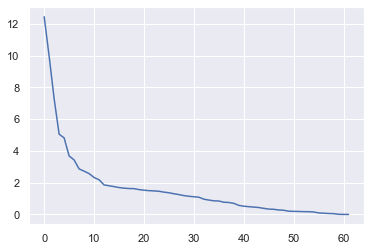

In [74]:
plt.plot(var_exp)

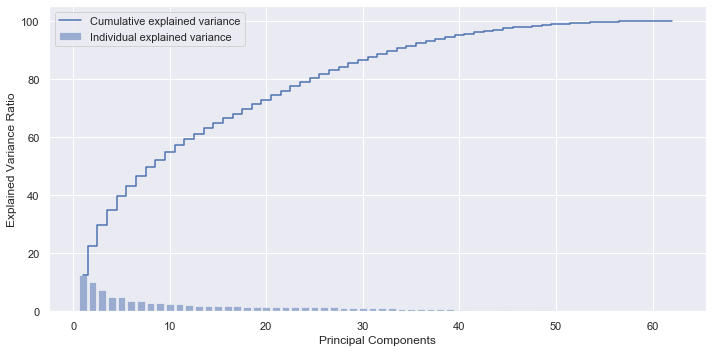

In [75]:
# Ploting we see that PCA is not giving us much benefit
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [76]:
#Using 28 components and printing the eigen vectors
pca3 = PCA(n_components=28)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[-0.00691759  0.23483961 -0.20629912 ...  0.00284374 -0.0003788
   0.017406  ]
 [ 0.01532866 -0.02575387  0.03048486 ...  0.00944941  0.02557689
   0.03104678]
 [ 0.05094243  0.14401394 -0.18604913 ... -0.0316189   0.04872985
   0.02191294]
 ...
 [ 0.0725798   0.12489598 -0.14379649 ...  0.07745584 -0.13063259
   0.16555424]
 [ 0.05078313 -0.03564429  0.16938605 ...  0.00667406 -0.16153881
  -0.08161272]
 [ 0.29835954 -0.06653541  0.1317706  ...  0.10476035 -0.26052265
  -0.22711025]]
[0.12446875 0.09953753 0.0727878  0.05053655 0.04818868 0.03683077
 0.03430871 0.0286649  0.02725428 0.02572162 0.02326372 0.02184407
 0.01860258 0.0180531  0.0175145  0.01692894 0.01653593 0.01631765
 0.01624579 0.01564804 0.01524998 0.01496391 0.01482389 0.01459242
 0.01404495 0.01362014 0.01302083 0.01242883]


In [77]:
#printing the original features and the reduced features
pca_8 = PCA(n_components = 28)
X_pca = pca_8.fit_transform(XScaled)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 442
Reduced number of features: 28


In [78]:
#viewing the first 5 observations of the pca components
pca_df = pd.DataFrame(data = X_pca)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.08,-0.42,-2.31,-0.58,1.09,-1.83,-0.08,-0.56,-0.45,0.97,...,-0.16,-0.49,0.87,0.32,0.55,-0.53,0.24,-1.80,-0.07,-0.72
1,0.02,-0.86,-1.58,-0.44,1.39,-1.25,-1.14,-0.74,0.10,0.93,...,-0.44,-1.82,0.73,-0.22,-1.00,0.13,0.47,-0.48,1.06,-0.10
2,0.62,0.49,-2.75,-1.83,2.02,0.12,-1.47,-4.61,-0.66,3.17,...,-0.26,1.26,0.36,0.96,0.59,-0.44,0.37,0.46,0.03,-0.89
3,0.58,0.47,-0.70,4.71,7.51,5.00,0.57,-2.70,0.15,0.53,...,0.89,14.15,14.13,-2.74,-1.36,3.90,6.10,1.61,1.12,2.47
4,0.38,0.76,-0.25,1.36,2.12,-3.45,0.49,-1.94,0.05,0.24,...,-0.23,-0.57,0.89,-0.06,-0.87,-0.80,0.49,3.09,0.48,-0.80


In [79]:
X_tr, X_te, y_tr, y_te = train_test_split(X_pca, y, test_size = 0.3, random_state = 10)

In [80]:
# Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
lrpca = LogisticRegression()

In [81]:
lrpca.fit(X_tr, y_tr)

LogisticRegression()

In [82]:
# Make predictions
y_pred = lrpca.predict(X_te) # Predictions
y_true = y_test # True values

Train accuracy: 0.93
Test accuracy: 0.92
              precision    recall  f1-score   support

          -1       0.94      0.98      0.96       440
           1       0.11      0.03      0.05        31

    accuracy                           0.92       471
   macro avg       0.52      0.51      0.50       471
weighted avg       0.88      0.92      0.90       471


Test confusion_matrix [[432   8]
 [ 30   1]]


Text(30.5, 0.5, 'True')

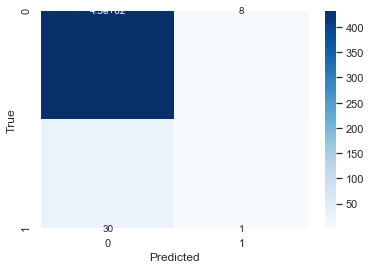

In [91]:
# Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 lrpca.predict(X_tr)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

print(classification_report(y_test, y_pred))

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix",cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [92]:
#PCA IS THE BEST MODEL AS COMPARED TO OTHERS.
#OUT OF 62 REDUCED FEATURES, 28 COMPONENTS ARE SELECTED AND ACCURACY IS 93%. 
# LOGISTIC REGRESSION HAS BEEN APPLIED FOR THE PCA AND MODEL HAS GOT US 93% ACCURACY.

In [84]:
import pickle

In [85]:
# save the model to disk
filename = 'final_model.sav'
saved_model =pickle.dump(clfRS, open(filename, 'wb'))

In [86]:
data_2= pd.read_excel('Future_predictions.xlsx')
data_2.head()

,Time,0,1,2,3,4,5,6,7,8,...,580,581,582,583,584,585,586,587,588,589
0,2008-07-19 11:55:00,3030.93,2564.00,2187.73,1411.13,1.36,100,97.61,0.12,1.50,...,nan,nan,0.50,0.01,0.00,2.36,nan,nan,nan,nan
1,2008-07-19 12:32:00,3095.78,2465.14,2230.42,1463.66,0.83,100,102.34,0.12,1.50,...,0.01,208.20,0.50,0.02,0.01,4.44,0.01,0.02,0.01,208.20
2,2008-07-19 13:17:00,2932.61,2559.94,2186.41,1698.02,1.51,100,95.49,0.12,1.44,...,0.01,82.86,0.50,0.02,0.00,3.17,0.06,0.05,0.01,82.86
3,2008-07-19 14:43:00,2988.72,2479.90,2199.03,909.79,1.32,100,104.24,0.12,1.49,...,0.00,73.84,0.50,0.01,0.00,2.05,0.02,0.01,0.00,73.84
4,2008-07-19 15:22:00,3032.24,2502.87,2233.37,1326.52,1.53,100,100.40,0.12,1.50,...,nan,nan,0.48,0.48,0.10,99.30,0.02,0.01,0.00,73.84


In [87]:
data1=data_2.fillna(data_2.mean())
data1.isnull().any().any()
data1.shape

(18, 591)

In [88]:
#We will now remove same values displayed throughout the column.
data1 = data1.drop(data1.columns[[5,13,42,49,52,69,97,141, 149,178,179,186,189, 190,191,192,
             193,194,226,229,230,231,232,233,
             234,235,236,237,240,241,242,243,
             256,257,258,259,260,261,262,263,
             264,265,266,276,284,313,314,315,
             322,325,326,327,328,329,330,364,
             369,370,371,372,373,374,375,378,
             379,380,381,394,395,396,397,398,
             399,400,401,402,403,404,414,422,
             449,450,451,458,461,462,463,464,
             465,466,481,498,501,502,503,504,
             505,506,507,508,509,512,513,514,
             515,528,529,530,531,532,533,534,
             535,536,537,538]], axis=1)
data1.head(2)

,Time,0,1,2,3,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,2008-07-19 11:55:00,3030.93,2564.00,2187.73,1411.13,100,97.61,0.12,1.50,0.02,...,0.01,93.59,0.50,0.01,0.00,2.36,0.02,0.02,0.01,86.40
1,2008-07-19 12:32:00,3095.78,2465.14,2230.42,1463.66,100,102.34,0.12,1.50,-0.00,...,0.01,208.20,0.50,0.02,0.01,4.44,0.01,0.02,0.01,208.20


In [89]:
# data=data_1.fillna(data_1.mean())
data = data_1.fillna(0)
data.isnull().any().any()
# data_1.head(2)

False

In [90]:
X_train, X_test  = train_test_split(X, test_size = 0.4, random_state = 42)

In [93]:
#CONCLUSION
#WE TRIED IMPLEMENTING LAZYPREDICT FOR IMBALANCED CLASSES.
#WE HAVE TRIED LOGISTIC REGRESSION, SVM  USING RANDOM OVER SAMPLING, ADASYN, SMOTE.
#ADASYN PERFORMED BETTER WITH SVM ALOGORITHM. 
#WE PERFORMED Z SCORE SCALING ON BOTH THE DATASETS AND TOOK PCA WITH N_COMPONENTS AS 28
#WE DID K-FOLD CROSS VALIDATION AND STRATIFIED K-FOLD CROSS VALIDATION WHICH HELPED IMPROVE THE RESULTS A FAIR BIT TO ABOUT OVERALL
# 93% ACCURACY
#WE USED GRID SEARCH FOR HYPER PARAMETER TUNING AND RESULTS WITH 93% ACCURACY